# 7.1 A Spectrum of workflows
Skip
# 7.2 Different ways to build Keras models
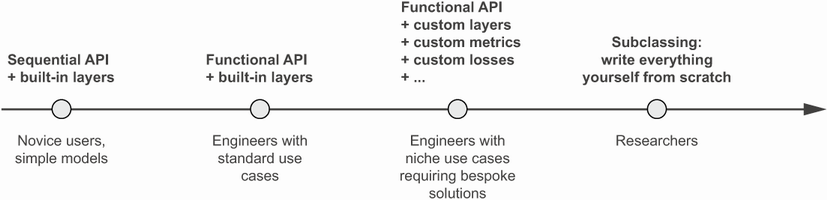

There are three APIs for building models in Keras (see figure):

1. **Sequential model**: the most approachable API—it’s basically a Python list. As such, it’s limited to simple stacks of layers.
2. **Functional API**: which focuses on graph-like model architectures. It represents a nice mid-point between usability and flexibility, and as such, it’s the most commonly used model-building API.
3. **Model subclassing**: a low-level option where you write everything yourself from scratch. This is ideal if you want full control over every little thing. However, you won’t get access to many built-in Keras features, and you will be more at risk of making mistakes.

## 7.2.1 The Sequential model
This is the simplest way to build a model in Keras. We are already familiar with this.

In [1]:
def display_val(val, header=""):
    lstr, rstr = "=" * 20, "=" * 20
    if header == "":
        header = "=" * 10
    else:
        lstr += " "
        rstr = " " + rstr

    print(lstr + f"{header}" + rstr)
    display(val)
    print("\n")


import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers


def display_val(val, header=""):
    lstr, rstr = "=" * 20, "=" * 20
    if header == "":
        header = "=" * 10
    else:
        lstr += " "
        rstr = " " + rstr

    print(lstr + f"{header}" + rstr)
    display(val)
    print("\n")


keras.backend.clear_session()

# Familiar form
model = keras.Sequential(
    [layers.Dense(64, activation="relu"), layers.Dense(10, activation="softmax")]
)

# Adding layers
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

# Models that are not built yet have no weight
## Calling 'model.weights' would produce error

# Building model
model.build(input_shape=(None, 3))
# print(f"model.weights:{model.weights}")
display_val(model.weights, header="model.weights")

model.summary()

# We can also name models and layers
named_model = keras.Sequential(name="my_example_model")
named_model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
named_model.add(layers.Dense(10, activation="relu", name="my_last_layer"))
named_model.build((None, 3))
named_model.summary()

# Specifying input shape in advance
model_with_defined_input_shape = keras.Sequential()
model_with_defined_input_shape.add(keras.Input(shape=(3,)))
model_with_defined_input_shape.add(layers.Dense(64, activation="relu"))
model_with_defined_input_shape.summary()

==================== model.weights ====================


[<KerasVariable shape=(3, 64), dtype=float32, path=sequential_1/dense_2/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_1/dense_2/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential_1/dense_3/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_3/bias>]

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_last_layer (Dense)           │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

## 7.2.2 The Functional API
Sequential model is simple but very limited, allowing only a single input/output. However, it is common to find models that use multiple inputs (ex. image + metadata), multiple outputs, or non-linear topology.

### Simple Example
Very basic use of Functional API

In [2]:
# Clear old model
keras.backend.clear_session()

## 1. Declare input
inputs = keras.Input(shape=(3,), name="my_input")

## 2. Create layer and call it to input
features = layers.Dense(64, activation="relu")(inputs)

## 3. Instantiate model by specifying input and output in model constructor
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

### Multi-Input, Multi-Output Model Example
Let’s say you’re building a system to rank customer support tickets by priority and route them to the appropriate department. Your model has three inputs:

* The title of the ticket (text input)
* The text body of the ticket (text input)
* Any tags added by the user (categorical input, assumed here to be one-hot encoded)

Your model also has two outputs:

* The priority score of the ticket, a scalar between 0 and 1 (sigmoid output)
* The department that should handle the ticket (a softmax over the set of departments)

In [3]:
# Clear old model
keras.backend.clear_session()

vocab_size = 10_000
num_tags = 100
num_departments = 4

# 1.1 Define model inputs
title = keras.Input(shape=(vocab_size,), name="title")
text_body = keras.Input(shape=(vocab_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

# 1.2 Create list of inputs
inputs = [title, text_body, tags]

# 2. Combine input features into a single tensor by concatenating them
features = layers.Concatenate()(inputs)

# 3. Apply intermediate layer to recombine input features into richer representations
features = layers.Dense(64, activation="relu")(features)

# 4.1 Define model outputs
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(
    features
)

# 4.2 Create list of outputs
outputs = [priority, department]

# 5. Create model specifying inputs and outputs
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

# 6. Create dummy data
num_samples = 1280

# 6.1 Dummy inputs
title_data = np.random.randint(0, 2, size=(num_samples, vocab_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocab_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# 6.2 Dummy targets
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))


# 7. Fit and evaluate

model.compile(
    optimizer="rmsprop",
    loss=["mean_squared_error", "categorical_crossentropy"],
    metrics=[["mean_absolute_error"], ["accuracy"]],
)
model.fit(
    [title_data, text_body_data, tags_data], [priority_data, department_data], epochs=1
)
model.evaluate(
    [title_data, text_body_data, tags_data], [priority_data, department_data]
)
priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data]
)

# We can use dicts to avoid worrying about the order of inputs
model.compile(
    optimizer="rmsprop",
    loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
    metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]},
)
history = model.fit(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data},
    epochs=1,
)
evaluation = model.evaluate(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data},
)
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

print("Evaluation:", evaluation)
print("Priority Predictions Shape:", priority_preds.shape)
print("Department Predictions Shape:", department_preds.shape)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, 10000)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_body           │ (None, 10000)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags (InputLayer)   │ (None, 100)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 20100)     │          0 │ title[0][0],      │
│ (Concatenate)       │                   │            │ text_body[0][0],  │
│                     │                   │            │ tags[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │  1,286,464 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ priority (Dense)    │ (None, 1)         │         65 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department (Dense)  │ (None, 4)         │        260 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,286,789 (4.91 MB)

 Trainable params: 1,286,789 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - department_accuracy: 0.3358 - loss: 32.0097 - priority_mean_absolute_error: 0.4597
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - department_accuracy: 0.5662 - loss: 16.3566 - priority_mean_absolute_error: 0.5111 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.3035 - loss: 27.3248 - priority_mean_absolute_error: 0.5230
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - department_accuracy: 0.0464 - loss: 16.6383 - priority_mean_absolute_error: 0.5111 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Evaluation: [16.4836368560791, 0.05546874925494194, 0.5246016979217529]
Priority Predictions Shape: (1280, 1)
Department Predictions Shape: (1280, 4)


### Access to Layer Connectivity
A functional model is an explicit data structure.

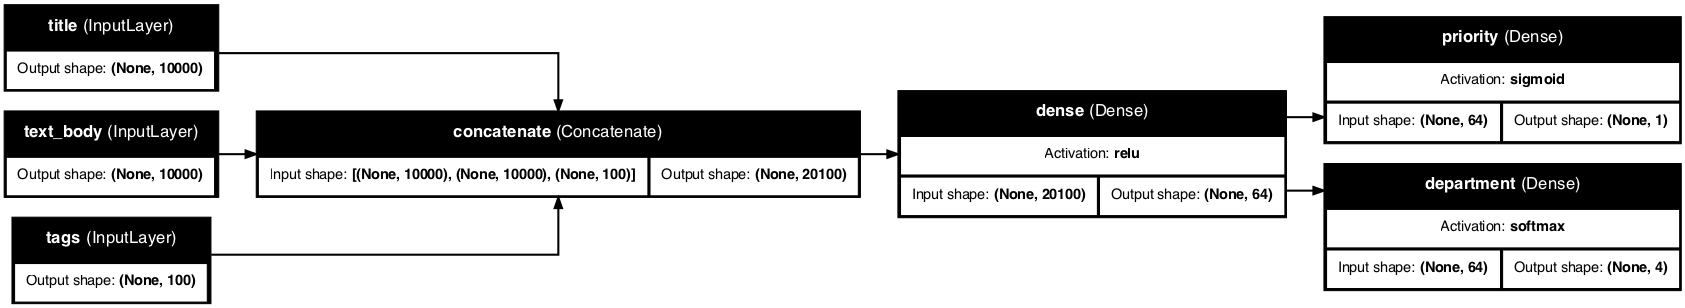



==================== model.layers ====================


[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]



==================== model.layers[3].input ====================


[<KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=None, name=tags>]



==================== model.layers[3].output ====================


<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor>

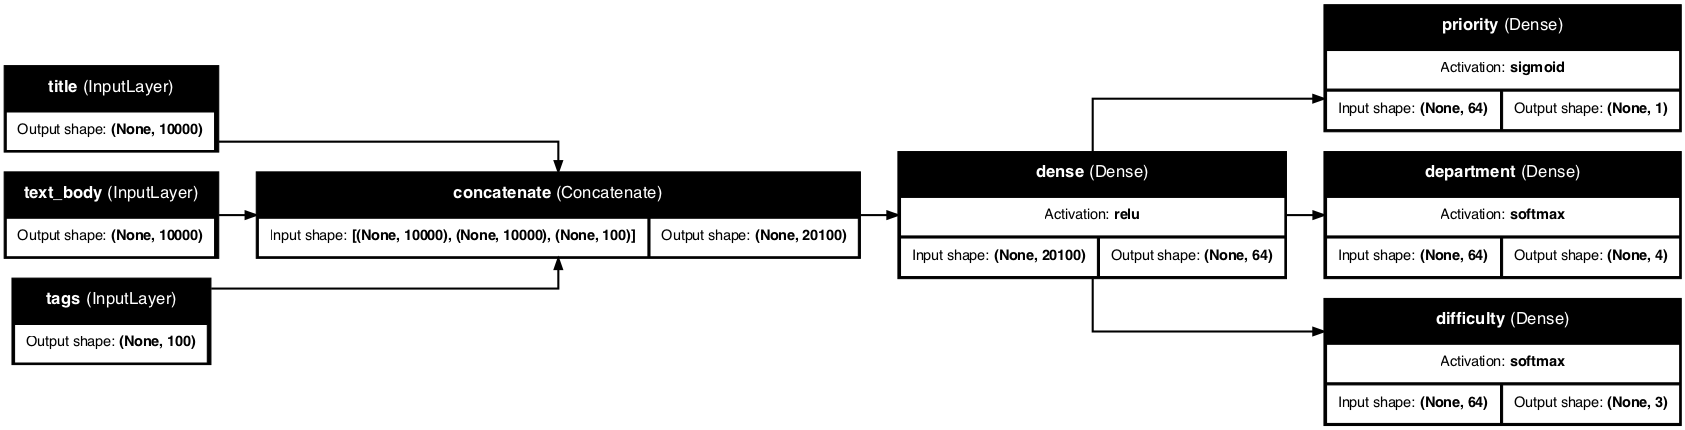

In [4]:
import os

# Inspect how models are connected
# None in tensor shape represents batch size - any size is allowed
display(
    keras.utils.plot_model(
        model,
        show_shapes=True,
        show_layer_activations=True,
        show_trainable=False,
        dpi=75,
        expand_nested=False,
        rankdir="LR",
        show_dtype=False,
        show_layer_names=True,
    )
)
print("\n")

# Access to layer connectivity means we can reuse nodes
# 1. Retrieving inputs/outputs of functional layer
display_val(model.layers, header="model.layers")
display_val(model.layers[3].input, "model.layers[3].input")
display_val(model.layers[3].output, "model.layers[3].output")

# 2. Creating a new model by reusing intermediate layer outputs
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)
new_model = keras.Model(
    inputs=[title, text_body, tags], outputs=[priority, department, difficulty]
)

display(
    keras.utils.plot_model(
        new_model,
        show_shapes=True,
        show_layer_activations=True,
        show_trainable=False,
        dpi=75,
        expand_nested=False,
        rankdir="LR",
        show_dtype=False,
        show_layer_names=True,
    )
)

if os.path.exists("model.png"):
    os.remove("model.png")

## 7.2.3 Subclassing the Model class

The last model-building pattern you should know about is the most advanced one: `Model` subclassing. You learned in chapter 3 how to subclass the `Layer` class to create custom layers. Subclassing `Model` is pretty similar:

- In the `__init__()` method, define the layers the model will use.
- In the `call()` method, define the forward pass of the model, reusing the layers previously created.
- Instantiate your subclass, and call it on data to create its weights.

**REWRITING OUR PREVIOUS EXAMPLE AS A SUBCLASSED MODEL**

Let’s take a look at a simple example: we will reimplement the customer support ticket management model using a `Model` subclass.

In [5]:
# Clear old model
keras.backend.clear_session()

# 1. A simple subclassed model


class CustomerTicketModel(keras.Model):
    def __init__(self, num_departments):
        super().__init__()

        # Define sub-layers in constructor
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(num_departments, activation="softmax")

    def call(self, inputs):
        # Define forward pass using this method

        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return {"priority": priority, "department": department}


# Sample usage
model = CustomerTicketModel(num_departments=4)

model.compile(
    optimizer="rmsprop",
    loss=["mean_squared_error", "categorical_crossentropy"],
    metrics=[["mean_absolute_error"], ["accuracy"]],
)

history = model.fit(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data},
    epochs=1,
)
evaluation = model.evaluate(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data},
)

priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

/opt/anaconda3/envs/deep-learning-intro-course/lib/python3.11/site-packages/keras/src/losses/losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - department_mean_absolute_error: 0.4926 - loss: 0.4747 - priority_accuracy: 0.0000e+00
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - department_mean_absolute_error: 0.5095 - loss: 0.5095 - priority_accuracy: 0.0000e+00 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


## 7.2.4 Mixing & matching components

In [6]:
# 1. Creating a Functional model that includes a subclassed model
class Classifier(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)


inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

# 2. Creating a subclassed model that includes a functional model
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)


class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)


model = MyModel()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Classifier)         │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_3 (Functional)       │ ?                      │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

# 7.3 Using built-in training and eval loops
## 7.3.1 Standard workflow
So far our workflows have been comprised of compile(), fit(), evaluate(), predict()

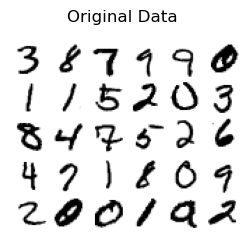

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8664 - loss: 0.4473 - val_accuracy: 0.9557 - val_loss: 0.1539
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9510 - loss: 0.1689 - val_accuracy: 0.9682 - val_loss: 0.1134
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9630 - loss: 0.1290 - val_accuracy: 0.9725 - val_loss: 0.1037
313/313 - 0s - 459us/step - accuracy: 0.9746 - loss: 0.0987
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step


In [19]:
from tensorflow.keras import datasets as kds
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


def get_mnist_model():
    inputs = keras.Input(shape=(28**2,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


def plot_digit(image_array):
    image = image_array.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")


# Prepare mnist
(images, labels), (test_images, test_labels) = kds.mnist.load_data()
labels, test_labels = to_categorical(labels), to_categorical(test_labels)
images = (
    images.reshape(images.shape[0], images.shape[1] * images.shape[2]).astype("float32")
    / 255
)
test_images = (
    test_images.reshape(
        test_images.shape[0], test_images.shape[1] * test_images.shape[2]
    ).astype("float32")
    / 255
)
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

plt.figure(figsize=(3, 3))
for idx, image_data in enumerate(train_images[:30]):
    plt.subplot(6, 6, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle("Original Data")
plt.show()

model = get_mnist_model()
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)
model.fit(
    train_images, train_labels, epochs=3, validation_data=(val_images, val_labels)
)
test_metrics = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)

## 7.3.2 Writing custom metrics
Similar to custom model

In [26]:
class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(
            name="mse_sum",
            initializer="zeros",
        )
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32"
        )

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_states(self):
        self.mse_sum.assign(0)
        self.total_samples.assign(0)


# Prepare mnist
(images, labels), (test_images, test_labels) = kds.mnist.load_data()
# labels, test_labels = to_categorical(labels), to_categorical(test_labels)
images = (
    images.reshape(images.shape[0], images.shape[1] * images.shape[2]).astype("float32")
    / 255
)
test_images = (
    test_images.reshape(
        test_images.shape[0], test_images.shape[1] * test_images.shape[2]
    ).astype("float32")
    / 255
)
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", RootMeanSquaredError()],
)
model.fit(
    train_images, train_labels, epochs=3, validation_data=(val_images, val_labels)
)
test_metrics = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8693 - loss: 0.4441 - rmse: 0.4355 - val_accuracy: 0.9557 - val_loss: 0.1496 - val_rmse: 0.2567
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9518 - loss: 0.1643 - rmse: 0.2726 - val_accuracy: 0.9672 - val_loss: 0.1145 - val_rmse: 0.2218
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9642 - loss: 0.1275 - rmse: 0.2372 - val_accuracy: 0.9729 - val_loss: 0.1052 - val_rmse: 0.2088
313/313 - 0s - 402us/step - accuracy: 0.9730 - loss: 0.0980 - rmse: 0.2066


## 7.3.3 Using Callbacks
**From book (this is a great analogy)**

Launching a training run on a large dataset for tens of epochs using `model.fit()` can be a bit like launching a paper airplane: past the initial impulse, you don’t have any control over its trajectory or its landing spot. If you want to avoid bad outcomes (and thus wasted paper airplanes), it’s smarter to use, not a paper plane, but a drone that can sense its environment, send data back to its operator, and automatically make steering decisions based on its current state. The Keras callbacks API will help you transform your call to `model.fit()` from a paper airplane into a smart, autonomous drone that can self-inspect and dynamically take action.

A callback is an object (a class instance implementing specific methods) that is passed to the model in the call to `fit()` and that is called by the model at various points during training. It has access to all the available data about the state of the model and its performance, and it can take action: interrupt training, save a model, load a different weight set, or otherwise alter the state of the model.

Here are some examples of ways you can use callbacks:

- **Model checkpointing**—Saving the current state of the model at different points during training.
- **Early stopping**—Interrupting training when the validation loss is no longer improving (and of course, saving the best model obtained during training).
- **Dynamically adjusting the value of certain parameters during training**—Such as the learning rate of the optimizer.
- **Logging training and validation metrics during training, or visualizing the representations learned by the model as they’re updated**—The `fit()` progress bar that you’re familiar with is in fact a callback!

In [29]:
# Example using Earlystopping and Modelcheckoint callbacks
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor="val_accuracy", min_delta=0.1, patience=2),
    keras.callbacks.ModelCheckpoint(
        filepath="model_checkpoint.keras", monitor="val_loss", save_best_only=True
    ),
]
model = get_mnist_model()
model.compile(
    optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
model.fit(
    train_images,
    train_labels,
    epochs=10,
    callbacks=callbacks_list,
    validation_data=(val_images, val_labels),
)

# NOTE - use model.save('checkpoint_path') to manually save model

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8647 - loss: 0.4448 - val_accuracy: 0.9609 - val_loss: 0.1439
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9531 - loss: 0.1663 - val_accuracy: 0.9671 - val_loss: 0.1190
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9642 - loss: 0.1268 - val_accuracy: 0.9719 - val_loss: 0.1064


In [30]:
keras.models.load_model("model_checkpoint.keras")

<Functional name=functional_35, built=True>

## 7.3.4 Custom Callbacks

Should come back to this - skipping for now as I get the feeling these "custom" callbacks/metrics will almost never be seen again.

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8642 - loss: 0.4533 - val_accuracy: 0.9539 - val_loss: 0.1586
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9515 - loss: 0.1670 - val_accuracy: 0.9673 - val_loss: 0.1138
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9619 - loss: 0.1336 - val_accuracy: 0.9734 - val_loss: 0.1017
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9688 - loss: 0.1111 - val_accuracy: 0.9742 - val_loss: 0.0950
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9720 - loss: 0.0994 - val_accuracy: 0.9758 - val_loss: 0.0979
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9748 - loss: 0.0955 - val_accuracy: 0.9767 - val_loss: 0.0980
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9762 - loss: 0.0890 - val_accuracy: 0.9790 - val_loss: 0.0883
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9784 - loss: 0.0764 - 

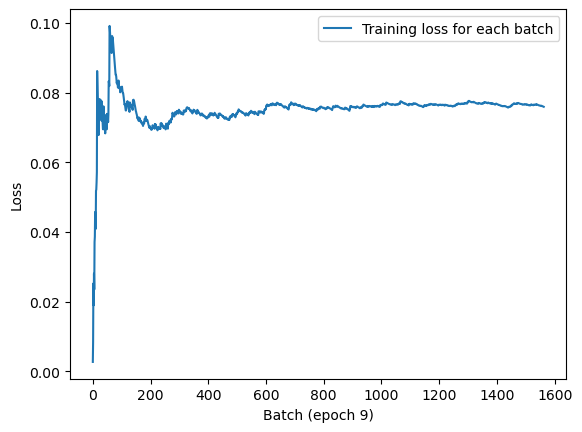

In [33]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(
            range(len(self.per_batch_losses)),
            self.per_batch_losses,
            label="Training loss for each batch",
        )
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"./plots/loss_history/plot_at_epoch_{epoch}")
        self.per_batch_losses = []


model = get_mnist_model()
model.compile(
    optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
model.fit(
    train_images,
    train_labels,
    epochs=10,
    callbacks=[LossHistory()],
    validation_data=(val_images, val_labels),
)

## 7.3.5 Monitoring and visualizing with TensorBoard
I will gloss over this as I believe we will use alternative tools in the future - come back as needed.

In [32]:
model = get_mnist_model()
model.compile(
    optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)


tensorboard = keras.callbacks.TensorBoard(
    log_dir="/Users/giacomoaris/Desktop/deep-learning-intro-course/7 Working with Keras - A deep dive/logs",
)
model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks=[tensorboard],
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8617 - loss: 0.4542 - val_accuracy: 0.9550 - val_loss: 0.1551
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9517 - loss: 0.1694 - val_accuracy: 0.9679 - val_loss: 0.1168
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9628 - loss: 0.1323 - val_accuracy: 0.9706 - val_loss: 0.1090
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9664 - loss: 0.1179 - val_accuracy: 0.9751 - val_loss: 0.0926
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9696 - loss: 0.1014 - val_accuracy: 0.9770 - val_loss: 0.0962
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9746 - loss: 0.0952 - val_accuracy: 0.9776 - val_loss: 0.0934
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9764 - loss: 0.0856 - val_accuracy: 0.9781 - val_loss: 0.0899
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9784 - loss: 0.0796 - 